In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
from mlrose_hiive.decorators import short_name
from mlrose_hiive.runners._runner_base import _RunnerBase
import time

from ortools.algorithms import pywrapknapsack_solver

%matplotlib inline

# Algorithms

### Random Restart Hill Climbing

In [2]:
def my_callback(**kwargs):
    print(f"Current Iteration: {kwargs['iteration']}")
    return True

In [3]:
def rrhc(problem, seed, restarts, max_iters):
    best_state, best_fitness, data = mlrose.random_hill_climb(problem=problem, max_attempts=10, max_iters=max_iters, 
                                                        restarts=restarts, init_state=None, curve=True, 
                                                        random_state=seed, state_fitness_callback=my_callback,
                                                        callback_user_info=[])
    
    return best_state, best_fitness, data

### Simulated Annealing

In [4]:
def sa(problem, schedule, seed, max_iters):
    best_state, best_fitness, data = mlrose.simulated_annealing(problem=problem, schedule=schedule, 
                                                      max_attempts = 10, max_iters = max_iters,
                                                      random_state = seed, curve = True, 
                                                      state_fitness_callback=my_callback, callback_user_info=[])
    
    return best_state, best_fitness, data

### Genetic Algorithm

In [5]:
def ga(problem, seed, pop_size, mutation, max_iters):
    best_state, best_fitness, data = mlrose.genetic_alg(problem=problem, pop_size=pop_size, mutation_prob=mutation, 
                                                    max_attempts=10, max_iters=max_iters, curve=True, random_state=seed,
                                                    state_fitness_callback=my_callback, callback_user_info=[])
    
    return best_state, best_fitness, data

### MIMIC

In [6]:
def mimic(problem, seed, pop_size, max_iters, keep_pct):
    best_state, best_fitness, data = mlrose.mimic(problem=problem, pop_size=pop_size, keep_pct=keep_pct, max_attempts=10, 
                                            max_iters=max_iters, curve=True, random_state=seed, 
                                            state_fitness_callback=my_callback, callback_user_info=[])
    
    return best_state, best_fitness, data

# Knapsack Problem

In [7]:
weights = np.random.randint(1, 15, 100)
values = 1 + np.arange(100)
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)

In [8]:
problem = mlrose.DiscreteOpt(length=len(values), fitness_fn=fitness, maximize=True, max_val=2)

# Random Restart

#### Untuned

In [28]:
seeds = np.random.randint(1, 50, 10)

fitness_values = []

fin_data = []
i=0
total_start_time = time.time()
for seed in seeds:
    print("=======================================\n")
    print("Seed number: ", i)
    
    start_time = time.time()
    best_state, best_fitness, data = rrhc(problem, seed=seed, restarts=0, max_iters=1000)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()


Seed number:  0
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Best State:  [1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0
 1 

Average Fitness Value:  2938.3
Total Time Taken:  0.08741617202758789


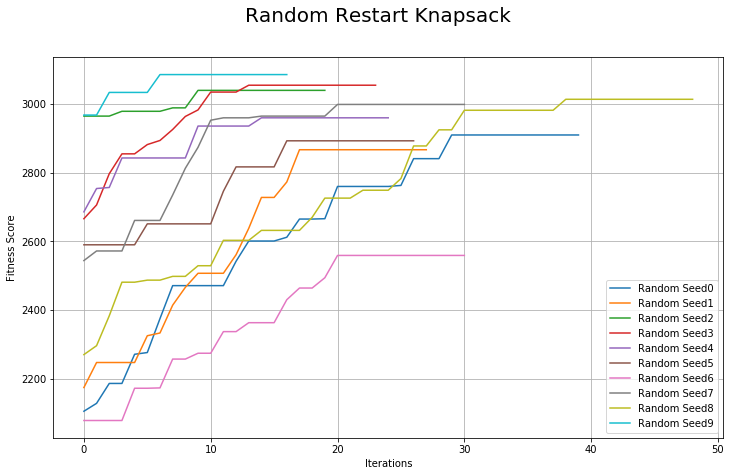

In [29]:
i=0
plt.figure(figsize=(12, 7))
plt.suptitle('Random Restart Knapsack', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    label = "Random Seed" + str(i)
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

plt.savefig('RHC.png')

#### Tuning Process

In [71]:
experiment_name = 'RRHC Tuning'
problem = mlrose.DiscreteOpt(length=len(values), fitness_fn=fitness, maximize=True, max_val=2)

rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name=experiment_name,
                    seed=0,
                    iteration_list=2 ** np.arange(10),
                    max_attempts=5000,
                    restart_list=[25, 75, 100])   
df_run_stats, df_run_curves = rhc.run()

the_index = np.argmax(df_run_stats["Fitness"])
df_run_stats.iloc[the_index]

Running rhc
*****************
*** Run START ***
*****************
restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2755.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0// 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[0.01], fitness:[2798.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0// 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[2], done:[False], time:[0.02], fitness:[27

restarts:[25], max_iters:[512], current_restart:[2]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[4], done:[False], time:[0.22], fitness:[2677.0000]
	[1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1// 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1// 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1...

restarts:[25], max_iters:[512], current_restart:[2]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[8], done:[False], time:[0.23], fitness:[2707.0000]
	[1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1// 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1// 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1...

restarts:[25], max_iters:[512], current_restart:[2]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[0.23], fitness:[2888.0000]
	[1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 

restarts:[25], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[213], iteration:[256], done:[False], time:[0.68], fitness:[3349.0000]
	[0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1// 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0// 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1...

restarts:[25], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[469], iteration:[512], done:[True], time:[0.77], fitness:[3349.0000]
	[0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1// 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0// 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1...

restarts:[25], max_iters:[512], current_restart:[5]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[0.78], fitness:[2288.0000]
	[0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[1.43], fitness:[3265.0000]
	[0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1// 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1// 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1...

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[16], done:[False], time:[1.44], fitness:[3376.0000]
	[0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1// 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1// 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1...

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[32], done:[False], time:[1.46], fitness:[3469.0000]
	[0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0

restarts:[25], max_iters:[512], current_restart:[9]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[220], iteration:[256], done:[False], time:[2.39], fitness:[3337.0000]
	[1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0// 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1...

restarts:[25], max_iters:[512], current_restart:[9]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[476], iteration:[512], done:[True], time:[2.55], fitness:[3337.0000]
	[1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1// 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0// 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1...

restarts:[25], max_iters:[512], current_restart:[10]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[2.57], fitness:[2483.0000]
	[1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0

restarts:[25], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[237], iteration:[256], done:[False], time:[3.34], fitness:[3028.0000]
	[0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1// 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0// 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1...

restarts:[25], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[493], iteration:[512], done:[True], time:[3.55], fitness:[3028.0000]
	[0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1// 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0// 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1...

restarts:[25], max_iters:[512], current_restart:[12]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[3.56], fitness:[2424.0000]
	[0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1

restarts:[25], max_iters:[512], current_restart:[13]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[252], iteration:[256], done:[False], time:[4.49], fitness:[2528.0000]
	[1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1// 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0// 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0...

restarts:[25], max_iters:[512], current_restart:[13]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[508], iteration:[512], done:[True], time:[4.70], fitness:[2528.0000]
	[1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1// 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0// 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0...

restarts:[25], max_iters:[512], current_restart:[14]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[4.72], fitness:[2588.0000]
	[0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1

restarts:[25], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[482], iteration:[512], done:[True], time:[6.29], fitness:[2677.0000]
	[0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0// 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0// 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0...

restarts:[25], max_iters:[512], current_restart:[16]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[6.31], fitness:[2470.0000]
	[1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0// 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0// 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1...

restarts:[25], max_iters:[512], current_restart:[16]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[6.31], fitness:[2470.0000]
	[1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0

restarts:[25], max_iters:[512], current_restart:[17]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[465], iteration:[512], done:[True], time:[7.73], fitness:[3047.0000]
	[1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1// 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1// 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1...

restarts:[25], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[7.75], fitness:[2709.0000]
	[1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0// 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0// 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0...

restarts:[25], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[7.75], fitness:[2709.0000]
	[1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1

restarts:[25], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[427], iteration:[512], done:[True], time:[9.32], fitness:[3021.0000]
	[0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0// 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1// 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1...

restarts:[25], max_iters:[512], current_restart:[20]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[9.35], fitness:[2865.0000]
	[1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0// 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1// 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1...

restarts:[25], max_iters:[512], current_restart:[20]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[9.35], fitness:[2865.0000]
	[1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0

restarts:[25], max_iters:[512], current_restart:[21]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[466], iteration:[512], done:[True], time:[10.87], fitness:[3266.0000]
	[1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1// 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1// 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0...

restarts:[25], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[10.90], fitness:[0.0000]
	[1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1// 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1// 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0...

restarts:[25], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[10.90], fitness:[0.0000]
	[1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 

restarts:[25], max_iters:[512], current_restart:[23]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[466], iteration:[512], done:[True], time:[12.58], fitness:[3005.0000]
	[0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1// 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0// 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0...

restarts:[25], max_iters:[512], current_restart:[24]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[12.61], fitness:[2580.0000]
	[0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1// 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1// 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0...

restarts:[25], max_iters:[512], current_restart:[24]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[12.61], fitness:[2647.0000]
	[0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 

restarts:[25], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[476], iteration:[512], done:[True], time:[14.44], fitness:[2856.0000]
	[0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0// 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0// 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[75], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2755.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0// 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

restarts:[75], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1

restarts:[75], max_iters:[512], current_restart:[2]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[8], done:[False], time:[0.86], fitness:[2707.0000]
	[1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1// 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1// 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1...

restarts:[75], max_iters:[512], current_restart:[2]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[0.90], fitness:[2888.0000]
	[1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1// 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1// 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1...

restarts:[75], max_iters:[512], current_restart:[2]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[18], iteration:[32], done:[False], time:[0.93], fitness:[2888.0000]
	[1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 

restarts:[75], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[5], iteration:[16], done:[False], time:[1.85], fitness:[3101.0000]
	[0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1// 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0// 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1...

restarts:[75], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[1.91], fitness:[3226.0000]
	[0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1// 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0// 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1...

restarts:[75], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[21], iteration:[64], done:[False], time:[1.96], fitness:[3349.0000]
	[0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0

restarts:[75], max_iters:[512], current_restart:[6]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[3.08], fitness:[2982.0000]
	[0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0// 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0// 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1...

restarts:[75], max_iters:[512], current_restart:[6]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[17], iteration:[64], done:[False], time:[3.16], fitness:[3230.0000]
	[0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0// 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0// 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[6]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[63], iteration:[128], done:[False], time:[3.23], fitness:[3329.0000]
	[0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1

restarts:[75], max_iters:[512], current_restart:[8]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[166], iteration:[256], done:[False], time:[4.59], fitness:[3016.0000]
	[1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1// 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1// 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0...

restarts:[75], max_iters:[512], current_restart:[8]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[422], iteration:[512], done:[True], time:[4.75], fitness:[3016.0000]
	[1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1// 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1// 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0...

restarts:[75], max_iters:[512], current_restart:[9]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[4.79], fitness:[2744.0000]
	[1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 

restarts:[75], max_iters:[512], current_restart:[10]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[465], iteration:[512], done:[True], time:[6.44], fitness:[2998.0000]
	[1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1// 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1// 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[6.48], fitness:[2563.0000]
	[0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1// 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0// 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1...

restarts:[75], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[6.49], fitness:[2578.0000]
	[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0

restarts:[75], max_iters:[512], current_restart:[12]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[430], iteration:[512], done:[True], time:[8.32], fitness:[2872.0000]
	[1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1// 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1// 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[13]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[8.39], fitness:[0.0000]
	[1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1// 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0// 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[13]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[8.39], fitness:[0.0000]
	[1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1

restarts:[75], max_iters:[512], current_restart:[14]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[489], iteration:[512], done:[True], time:[10.22], fitness:[3246.0000]
	[0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0// 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0// 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[10.26], fitness:[2274.0000]
	[0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0// 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0// 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0...

restarts:[75], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[10.27], fitness:[2328.0000]
	[0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 

restarts:[75], max_iters:[512], current_restart:[16]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[448], iteration:[512], done:[True], time:[12.12], fitness:[3494.0000]
	[1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0// 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0// 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[17]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[12.18], fitness:[2678.0000]
	[1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1// 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1// 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1...

restarts:[75], max_iters:[512], current_restart:[17]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[12.18], fitness:[2716.0000]
	[1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 

restarts:[75], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[438], iteration:[512], done:[True], time:[14.23], fitness:[3244.0000]
	[1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0// 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0// 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[14.28], fitness:[2286.0000]
	[0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0// 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0// 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1...

restarts:[75], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[14.29], fitness:[2286.0000]
	[0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 

restarts:[75], max_iters:[512], current_restart:[20]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[495], iteration:[512], done:[True], time:[16.69], fitness:[3078.0000]
	[1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0// 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1// 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[21]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[16.75], fitness:[2260.0000]
	[1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0// 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1// 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0...

restarts:[75], max_iters:[512], current_restart:[21]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[16.76], fitness:[2260.0000]
	[1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 

restarts:[75], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[450], iteration:[512], done:[True], time:[19.26], fitness:[3210.0000]
	[1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1// 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1// 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[23]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[19.32], fitness:[2291.0000]
	[0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1// 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0// 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[23]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[19.32], fitness:[2291.0000]
	[0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 

restarts:[75], max_iters:[512], current_restart:[24]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[390], iteration:[512], done:[True], time:[22.10], fitness:[3229.0000]
	[0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1// 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1// 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0...

restarts:[75], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[22.16], fitness:[2042.0000]
	[0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0// 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0// 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0...

restarts:[75], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[22.16], fitness:[2122.0000]
	[0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 

restarts:[75], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[461], iteration:[512], done:[True], time:[24.79], fitness:[2992.0000]
	[0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0// 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0// 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[27]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[24.87], fitness:[2281.0000]
	[1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0// 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0// 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1...

restarts:[75], max_iters:[512], current_restart:[27]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[24.88], fitness:[2357.0000]
	[1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 

restarts:[75], max_iters:[512], current_restart:[28]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[433], iteration:[512], done:[True], time:[27.75], fitness:[3140.0000]
	[0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0// 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0// 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1...

restarts:[75], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[27.81], fitness:[2374.0000]
	[0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0// 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0// 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0...

restarts:[75], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[27.82], fitness:[2374.0000]
	[0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 

restarts:[75], max_iters:[512], current_restart:[30]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[450], iteration:[512], done:[True], time:[30.66], fitness:[3189.0000]
	[1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0// 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1// 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[31]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[30.75], fitness:[1910.0000]
	[0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0// 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1// 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1...

restarts:[75], max_iters:[512], current_restart:[31]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[30.75], fitness:[1910.0000]
	[0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 

restarts:[75], max_iters:[512], current_restart:[32]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[495], iteration:[512], done:[True], time:[34.33], fitness:[2876.0000]
	[0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1// 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0// 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0...

restarts:[75], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[34.42], fitness:[2864.0000]
	[0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1// 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1// 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1...

restarts:[75], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[34.42], fitness:[2864.0000]
	[0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 

restarts:[75], max_iters:[512], current_restart:[34]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[513], iteration:[512], done:[True], time:[38.07], fitness:[0.0000]
	[1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1// 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1// 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[35]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[38.14], fitness:[2813.0000]
	[1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0// 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1// 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0...

restarts:[75], max_iters:[512], current_restart:[35]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[38.14], fitness:[2813.0000]
	[1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1

restarts:[75], max_iters:[512], current_restart:[36]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[477], iteration:[512], done:[True], time:[41.63], fitness:[3232.0000]
	[1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1// 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1// 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1...

restarts:[75], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[41.71], fitness:[2967.0000]
	[1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1// 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0// 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1...

restarts:[75], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[41.71], fitness:[3061.0000]
	[1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 

restarts:[75], max_iters:[512], current_restart:[38]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[403], iteration:[512], done:[True], time:[46.02], fitness:[3243.0000]
	[1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0// 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0// 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0...

restarts:[75], max_iters:[512], current_restart:[39]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[46.10], fitness:[2535.0000]
	[0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0// 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0// 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1...

restarts:[75], max_iters:[512], current_restart:[39]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[46.10], fitness:[2535.0000]
	[0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 

restarts:[75], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[482], iteration:[512], done:[True], time:[50.15], fitness:[3207.0000]
	[1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1// 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0// 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[41]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[50.23], fitness:[2821.0000]
	[0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0// 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1// 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1...

restarts:[75], max_iters:[512], current_restart:[41]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[50.24], fitness:[2878.0000]
	[0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 

restarts:[75], max_iters:[512], current_restart:[42]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[261], iteration:[512], done:[True], time:[55.25], fitness:[3355.0000]
	[0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1// 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1// 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[43]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[55.34], fitness:[2072.0000]
	[0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0// 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0// 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0...

restarts:[75], max_iters:[512], current_restart:[43]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[55.34], fitness:[2075.0000]
	[0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 

restarts:[75], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[461], iteration:[512], done:[True], time:[59.91], fitness:[3214.0000]
	[1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1// 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0// 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[45]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[59.99], fitness:[2846.0000]
	[1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0// 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1// 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0...

restarts:[75], max_iters:[512], current_restart:[45]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[59.99], fitness:[2846.0000]
	[1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 

restarts:[75], max_iters:[512], current_restart:[46]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[496], iteration:[512], done:[True], time:[64.82], fitness:[3345.0000]
	[0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1// 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1// 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[64.91], fitness:[2261.0000]
	[1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0// 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0// 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0...

restarts:[75], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[64.91], fitness:[2313.0000]
	[1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 

restarts:[75], max_iters:[512], current_restart:[48]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[460], iteration:[512], done:[True], time:[69.75], fitness:[2848.0000]
	[1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0// 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0// 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[49]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[69.83], fitness:[2715.0000]
	[1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1// 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1// 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[49]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[69.84], fitness:[2715.0000]
	[1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 

restarts:[75], max_iters:[512], current_restart:[50]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[467], iteration:[512], done:[True], time:[75.36], fitness:[2943.0000]
	[0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1// 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1// 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1...

restarts:[75], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[75.45], fitness:[2344.0000]
	[0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0// 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0// 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1...

restarts:[75], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[75.46], fitness:[2344.0000]
	[0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 

restarts:[75], max_iters:[512], current_restart:[52]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[491], iteration:[512], done:[True], time:[81.21], fitness:[3104.0000]
	[0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1// 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1// 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0...

restarts:[75], max_iters:[512], current_restart:[53]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[81.31], fitness:[2799.0000]
	[0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1// 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0// 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1...

restarts:[75], max_iters:[512], current_restart:[53]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[81.31], fitness:[2866.0000]
	[0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 

restarts:[75], max_iters:[512], current_restart:[54]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[513], iteration:[512], done:[True], time:[86.48], fitness:[0.0000]
	[0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0// 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0// 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1...

restarts:[75], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[86.58], fitness:[2909.0000]
	[0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1// 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1// 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0...

restarts:[75], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[86.59], fitness:[2909.0000]
	[0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0

restarts:[75], max_iters:[512], current_restart:[56]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[461], iteration:[512], done:[True], time:[92.31], fitness:[3113.0000]
	[1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1// 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0// 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0...

restarts:[75], max_iters:[512], current_restart:[57]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[92.41], fitness:[2860.0000]
	[1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0// 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1// 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1...

restarts:[75], max_iters:[512], current_restart:[57]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[92.42], fitness:[2860.0000]
	[1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 

restarts:[75], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[473], iteration:[512], done:[True], time:[99.33], fitness:[2990.0000]
	[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1// 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1// 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1...

restarts:[75], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[99.42], fitness:[2226.0000]
	[0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1// 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0// 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0...

restarts:[75], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[99.42], fitness:[2295.0000]
	[0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 

restarts:[75], max_iters:[512], current_restart:[60]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[401], iteration:[512], done:[True], time:[105.84], fitness:[3180.0000]
	[0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1// 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1// 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0...

restarts:[75], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[105.95], fitness:[0.0000]
	[1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1// 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0// 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1...

restarts:[75], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[105.96], fitness:[0.0000]
	[1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0

restarts:[75], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[424], iteration:[512], done:[True], time:[113.53], fitness:[3342.0000]
	[0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1// 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0// 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1...

restarts:[75], max_iters:[512], current_restart:[63]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[113.63], fitness:[2843.0000]
	[1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1// 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0// 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1...

restarts:[75], max_iters:[512], current_restart:[63]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[113.64], fitness:[2845.0000]
	[1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1

restarts:[75], max_iters:[512], current_restart:[64]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[62], iteration:[512], done:[True], time:[120.68], fitness:[3448.0000]
	[0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0// 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1// 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1...

restarts:[75], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[120.78], fitness:[2862.0000]
	[1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1// 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1// 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0...

restarts:[75], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[120.78], fitness:[2862.0000]
	[1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 

restarts:[75], max_iters:[512], current_restart:[66]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[398], iteration:[512], done:[True], time:[127.01], fitness:[3409.0000]
	[1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1// 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1// 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0...

restarts:[75], max_iters:[512], current_restart:[67]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[127.12], fitness:[2329.0000]
	[1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0// 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1// 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0...

restarts:[75], max_iters:[512], current_restart:[67]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[127.12], fitness:[2329.0000]
	[1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1

restarts:[75], max_iters:[512], current_restart:[68]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[492], iteration:[512], done:[True], time:[133.35], fitness:[2804.0000]
	[1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0// 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0// 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1...

restarts:[75], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[133.45], fitness:[3014.0000]
	[0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1// 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0// 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1...

restarts:[75], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[133.46], fitness:[3079.0000]
	[0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1

restarts:[75], max_iters:[512], current_restart:[70]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[493], iteration:[512], done:[True], time:[140.03], fitness:[3068.0000]
	[1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1// 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1// 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0...

restarts:[75], max_iters:[512], current_restart:[71]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[140.14], fitness:[2672.0000]
	[1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0// 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0// 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0...

restarts:[75], max_iters:[512], current_restart:[71]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[140.14], fitness:[2672.0000]
	[1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1

restarts:[75], max_iters:[512], current_restart:[72]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[402], iteration:[512], done:[True], time:[147.00], fitness:[2917.0000]
	[0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1// 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1// 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0...

restarts:[75], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[147.11], fitness:[2526.0000]
	[0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0// 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0// 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0...

restarts:[75], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[147.11], fitness:[2576.0000]
	[0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1

restarts:[75], max_iters:[512], current_restart:[74]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[499], iteration:[512], done:[True], time:[154.96], fitness:[2655.0000]
	[0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0// 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1// 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0...

restarts:[75], max_iters:[512], current_restart:[75]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[155.07], fitness:[2668.0000]
	[0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1// 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1// 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0...

restarts:[75], max_iters:[512], current_restart:[75]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[155.08], fitness:[2668.0000]
	[0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0

restarts:[100], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[442], iteration:[512], done:[True], time:[1.18], fitness:[3155.0000]
	[0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0// 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

restarts:[100], max_iters:[512], current_restart:[1]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[1.32], fitness:[2461.0000]
	[0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0// 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0// 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1...

restarts:[100], max_iters:[512], current_restart:[1]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[1.32], fitness:[2487.0000]
	[0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1

restarts:[100], max_iters:[512], current_restart:[2]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[498], iteration:[512], done:[True], time:[3.76], fitness:[2888.0000]
	[1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1// 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1// 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1...

restarts:[100], max_iters:[512], current_restart:[3]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[3.87], fitness:[0.0000]
	[0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1// 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1// 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[3]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[1], done:[False], time:[3.88], fitness:[0.0000]
	[0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0

restarts:[100], max_iters:[512], current_restart:[5]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[7.10], fitness:[2288.0000]
	[0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1// 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0// 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0...

restarts:[100], max_iters:[512], current_restart:[5]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[7.11], fitness:[2381.0000]
	[0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1// 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0// 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0...

restarts:[100], max_iters:[512], current_restart:[5]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[2], done:[False], time:[7.22], fitness:[2381.0000]
	[0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 

restarts:[100], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[0], iteration:[0], done:[False], time:[9.90], fitness:[3063.0000]
	[0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1// 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1// 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[1], done:[False], time:[9.90], fitness:[3157.0000]
	[0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1// 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1// 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[2], done:[False], time:[10.02], fitness:[3162.0000]
	[0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1

restarts:[100], max_iters:[512], current_restart:[9]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[2], done:[False], time:[13.51], fitness:[2744.0000]
	[1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1// 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0// 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[9]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[4], done:[False], time:[13.64], fitness:[2884.0000]
	[1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1// 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0// 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[9]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[5], iteration:[8], done:[False], time:[13.78], fitness:[2884.0000]
	[1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0

restarts:[100], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[2], done:[False], time:[19.26], fitness:[2578.0000]
	[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1// 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0// 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[4], done:[False], time:[19.39], fitness:[2578.0000]
	[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1// 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0// 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[19.53], fitness:[2715.0000]
	[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 

restarts:[100], max_iters:[512], current_restart:[13]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[2], done:[False], time:[24.38], fitness:[0.0000]
	[1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1// 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0// 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[13]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[4], done:[False], time:[24.58], fitness:[2516.0000]
	[1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1// 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0// 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[13]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[8], done:[False], time:[24.84], fitness:[2528.0000]
	[1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[2], done:[False], time:[30.08], fitness:[2340.0000]
	[0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0// 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0// 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[4], done:[False], time:[30.20], fitness:[2389.0000]
	[0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0// 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0// 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[8], done:[False], time:[30.38], fitness:[2430.0000]
	[0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 

restarts:[100], max_iters:[512], current_restart:[17]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[4], done:[False], time:[33.69], fitness:[2716.0000]
	[1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1// 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1// 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[17]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[8], done:[False], time:[33.86], fitness:[2742.0000]
	[1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1// 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1// 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[17]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[34.04], fitness:[2910.0000]
	[1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[37.88], fitness:[2536.0000]
	[0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0// 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1// 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[38.03], fitness:[2640.0000]
	[0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0// 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1// 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[32], done:[False], time:[38.19], fitness:[2955.0000]
	[0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 

restarts:[100], max_iters:[512], current_restart:[21]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[42.12], fitness:[2576.0000]
	[1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0// 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1// 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0...

restarts:[100], max_iters:[512], current_restart:[21]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[42.26], fitness:[2814.0000]
	[1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0// 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1// 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0...

restarts:[100], max_iters:[512], current_restart:[21]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[5], iteration:[32], done:[False], time:[42.42], fitness:[3031.0000]
	[1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 

restarts:[100], max_iters:[512], current_restart:[23]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[46.11], fitness:[2505.0000]
	[0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1// 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0// 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[23]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[46.25], fitness:[2755.0000]
	[0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1// 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0// 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[23]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[46.43], fitness:[2969.0000]
	[0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 

restarts:[100], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[8], done:[False], time:[50.21], fitness:[2275.0000]
	[0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0// 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0// 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0...

restarts:[100], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[50.35], fitness:[2668.0000]
	[0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0// 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0// 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1...

restarts:[100], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[11], iteration:[32], done:[False], time:[50.51], fitness:[2821.0000]
	[0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0

restarts:[100], max_iters:[512], current_restart:[27]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[55.22], fitness:[2500.0000]
	[1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1// 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0// 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[27]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[16], done:[False], time:[55.37], fitness:[2659.0000]
	[1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1// 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0// 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1...

restarts:[100], max_iters:[512], current_restart:[27]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[6], iteration:[32], done:[False], time:[55.53], fitness:[2941.0000]
	[1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 

restarts:[100], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[60.67], fitness:[2670.0000]
	[0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0// 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0// 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0...

restarts:[100], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[16], done:[False], time:[60.89], fitness:[2767.0000]
	[0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0// 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0// 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0...

restarts:[100], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[32], done:[False], time:[61.08], fitness:[2967.0000]
	[0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 

restarts:[100], max_iters:[512], current_restart:[31]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[66.11], fitness:[2004.0000]
	[0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0// 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1// 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1...

restarts:[100], max_iters:[512], current_restart:[31]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[66.30], fitness:[2373.0000]
	[0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0// 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1// 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1...

restarts:[100], max_iters:[512], current_restart:[31]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[32], done:[False], time:[66.52], fitness:[2720.0000]
	[0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[8], done:[False], time:[71.94], fitness:[3062.0000]
	[0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1// 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1// 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[16], done:[False], time:[72.14], fitness:[3282.0000]
	[0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1// 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1// 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[19], iteration:[32], done:[False], time:[72.35], fitness:[3282.0000]
	[0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1

restarts:[100], max_iters:[512], current_restart:[35]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[77.12], fitness:[2909.0000]
	[1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0// 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1// 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[35]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[9], iteration:[16], done:[False], time:[77.29], fitness:[2909.0000]
	[1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0// 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1// 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[35]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[15], iteration:[32], done:[False], time:[77.48], fitness:[2970.0000]
	[1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0

restarts:[100], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[8], done:[False], time:[82.92], fitness:[3233.0000]
	[1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1// 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0// 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1...

restarts:[100], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[12], iteration:[16], done:[False], time:[83.09], fitness:[3233.0000]
	[1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1// 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0// 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1...

restarts:[100], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[28], iteration:[32], done:[False], time:[83.27], fitness:[3233.0000]
	[1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 

restarts:[100], max_iters:[512], current_restart:[39]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[89.46], fitness:[2659.0000]
	[0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0// 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0// 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[39]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[9], iteration:[16], done:[False], time:[89.63], fitness:[2659.0000]
	[0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0// 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0// 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[39]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[32], done:[False], time:[89.85], fitness:[2990.0000]
	[0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 

restarts:[100], max_iters:[512], current_restart:[41]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[8], done:[False], time:[95.50], fitness:[2976.0000]
	[0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0// 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1// 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1...

restarts:[100], max_iters:[512], current_restart:[41]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[95.67], fitness:[3242.0000]
	[0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0// 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1// 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[41]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[7], iteration:[32], done:[False], time:[95.87], fitness:[3392.0000]
	[0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 

restarts:[100], max_iters:[512], current_restart:[43]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[101.74], fitness:[2493.0000]
	[0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0// 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0// 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0...

restarts:[100], max_iters:[512], current_restart:[43]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[101.94], fitness:[2665.0000]
	[0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0// 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0// 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0...

restarts:[100], max_iters:[512], current_restart:[43]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[32], done:[False], time:[102.15], fitness:[3063.0000]
	[0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0

restarts:[100], max_iters:[512], current_restart:[45]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[108.38], fitness:[3104.0000]
	[1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0// 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1// 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0...

restarts:[100], max_iters:[512], current_restart:[45]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[108.57], fitness:[3226.0000]
	[1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0// 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1// 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0...

restarts:[100], max_iters:[512], current_restart:[45]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[32], done:[False], time:[108.78], fitness:[3580.0000]
	[1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[8], done:[False], time:[114.92], fitness:[2480.0000]
	[1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0// 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0// 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0...

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[11], iteration:[16], done:[False], time:[115.09], fitness:[2480.0000]
	[1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0// 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0// 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0...

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[27], iteration:[32], done:[False], time:[115.31], fitness:[2480.0000]
	[1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1

restarts:[100], max_iters:[512], current_restart:[49]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[121.93], fitness:[2867.0000]
	[1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1// 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1// 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[49]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[6], iteration:[16], done:[False], time:[122.13], fitness:[2994.0000]
	[1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1// 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1// 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[49]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[13], iteration:[32], done:[False], time:[122.36], fitness:[3024.0000]
	[1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[128.92], fitness:[2522.0000]
	[0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0// 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0// 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1...

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[129.10], fitness:[2765.0000]
	[0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0// 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0// 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1...

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[129.34], fitness:[3120.0000]
	[0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1

restarts:[100], max_iters:[512], current_restart:[53]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[136.34], fitness:[3097.0000]
	[0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1// 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0// 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[53]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[7], iteration:[16], done:[False], time:[136.54], fitness:[3175.0000]
	[0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1// 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0// 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[53]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[12], iteration:[32], done:[False], time:[136.78], fitness:[3245.0000]
	[0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 

restarts:[100], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[143.86], fitness:[3096.0000]
	[0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1// 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1// 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[5], iteration:[16], done:[False], time:[144.08], fitness:[3284.0000]
	[0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1// 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1// 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[21], iteration:[32], done:[False], time:[144.34], fitness:[3284.0000]
	[0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 

restarts:[100], max_iters:[512], current_restart:[57]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[8], done:[False], time:[152.56], fitness:[3095.0000]
	[1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0// 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1// 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1...

restarts:[100], max_iters:[512], current_restart:[57]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[152.77], fitness:[3140.0000]
	[1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0// 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1// 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1...

restarts:[100], max_iters:[512], current_restart:[57]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[15], iteration:[32], done:[False], time:[153.03], fitness:[3174.0000]
	[1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 

restarts:[100], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[160.74], fitness:[2632.0000]
	[0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1// 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0// 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[160.97], fitness:[2731.0000]
	[0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1// 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0// 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[5], iteration:[32], done:[False], time:[161.24], fitness:[3077.0000]
	[0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0

restarts:[100], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[9], iteration:[8], done:[False], time:[168.74], fitness:[0.0000]
	[1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1// 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0// 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[17], iteration:[16], done:[False], time:[168.95], fitness:[0.0000]
	[1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1// 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0// 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1...

restarts:[100], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[33], iteration:[32], done:[False], time:[169.19], fitness:[0.0000]
	[1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 

restarts:[100], max_iters:[512], current_restart:[63]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[177.36], fitness:[3015.0000]
	[1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1// 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0// 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1...

restarts:[100], max_iters:[512], current_restart:[63]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[16], done:[False], time:[177.58], fitness:[3132.0000]
	[1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1// 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0// 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1...

restarts:[100], max_iters:[512], current_restart:[63]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[20], iteration:[32], done:[False], time:[177.85], fitness:[3132.0000]
	[1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[186.08], fitness:[3094.0000]
	[1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1// 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1// 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0...

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[186.34], fitness:[3240.0000]
	[1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1// 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1// 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0...

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[18], iteration:[32], done:[False], time:[186.66], fitness:[3240.0000]
	[1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 

restarts:[100], max_iters:[512], current_restart:[67]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[195.09], fitness:[2552.0000]
	[1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0// 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1// 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0...

restarts:[100], max_iters:[512], current_restart:[67]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[16], done:[False], time:[195.30], fitness:[2661.0000]
	[1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0// 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1// 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0...

restarts:[100], max_iters:[512], current_restart:[67]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[195.58], fitness:[2946.0000]
	[1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0

restarts:[100], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[204.24], fitness:[3194.0000]
	[0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1// 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0// 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1...

restarts:[100], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[9], iteration:[16], done:[False], time:[204.45], fitness:[3194.0000]
	[0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1// 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0// 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1...

restarts:[100], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[13], iteration:[32], done:[False], time:[204.71], fitness:[3239.0000]
	[0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 

restarts:[100], max_iters:[512], current_restart:[71]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[8], done:[False], time:[215.10], fitness:[2824.0000]
	[1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0// 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1// 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[71]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[215.32], fitness:[2989.0000]
	[1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0// 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1// 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[71]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[215.59], fitness:[3352.0000]
	[1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0

restarts:[100], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[224.10], fitness:[2641.0000]
	[0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0// 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0// 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[16], done:[False], time:[224.33], fitness:[2706.0000]
	[0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0// 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0// 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0...

restarts:[100], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[224.60], fitness:[3214.0000]
	[0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1

restarts:[100], max_iters:[512], current_restart:[75]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[233.30], fitness:[2805.0000]
	[0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1// 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1// 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[75]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[233.52], fitness:[3062.0000]
	[0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1// 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1// 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0...

restarts:[100], max_iters:[512], current_restart:[75]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[32], done:[False], time:[233.80], fitness:[3230.0000]
	[0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0

restarts:[100], max_iters:[512], current_restart:[77]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[8], done:[False], time:[242.71], fitness:[2654.0000]
	[0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0// 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0// 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[77]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[242.94], fitness:[2873.0000]
	[0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0// 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0// 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[77]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[6], iteration:[32], done:[False], time:[243.22], fitness:[3094.0000]
	[0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[8], done:[False], time:[252.36], fitness:[2457.0000]
	[0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0// 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1// 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1...

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[252.60], fitness:[2764.0000]
	[0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0// 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1// 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1...

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[252.88], fitness:[2970.0000]
	[1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1

restarts:[100], max_iters:[512], current_restart:[81]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[262.23], fitness:[2593.0000]
	[0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0// 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1// 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1...

restarts:[100], max_iters:[512], current_restart:[81]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[5], iteration:[16], done:[False], time:[262.47], fitness:[2686.0000]
	[0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0// 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1// 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1...

restarts:[100], max_iters:[512], current_restart:[81]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[262.76], fitness:[3585.0000]
	[0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[8], done:[False], time:[272.46], fitness:[3030.0000]
	[0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1// 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1// 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1...

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[5], iteration:[16], done:[False], time:[272.70], fitness:[3126.0000]
	[0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1// 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1// 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1...

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[273.03], fitness:[3438.0000]
	[0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0

restarts:[100], max_iters:[512], current_restart:[85]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[4], iteration:[16], done:[False], time:[283.50], fitness:[2898.0000]
	[1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1// 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1// 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0...

restarts:[100], max_iters:[512], current_restart:[85]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[7], iteration:[32], done:[False], time:[283.81], fitness:[2959.0000]
	[1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1// 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1// 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0...

restarts:[100], max_iters:[512], current_restart:[85]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[39], iteration:[64], done:[False], time:[284.27], fitness:[2959.0000]
	[1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0

restarts:[100], max_iters:[512], current_restart:[87]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[294.15], fitness:[2721.0000]
	[1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1// 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0// 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0...

restarts:[100], max_iters:[512], current_restart:[87]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[13], iteration:[32], done:[False], time:[294.45], fitness:[2910.0000]
	[1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1// 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0// 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0...

restarts:[100], max_iters:[512], current_restart:[87]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[45], iteration:[64], done:[False], time:[294.86], fitness:[2910.0000]
	[1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 

restarts:[100], max_iters:[512], current_restart:[89]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[16], done:[False], time:[304.99], fitness:[2867.0000]
	[0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1// 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0// 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[89]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[13], iteration:[32], done:[False], time:[305.30], fitness:[2886.0000]
	[0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1// 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0// 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[89]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[30], iteration:[64], done:[False], time:[305.71], fitness:[2932.0000]
	[0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 

restarts:[100], max_iters:[512], current_restart:[91]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[15], iteration:[16], done:[False], time:[315.97], fitness:[2881.0000]
	[1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1// 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1// 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[91]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[14], iteration:[32], done:[False], time:[316.29], fitness:[2911.0000]
	[1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1// 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1// 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[91]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[46], iteration:[64], done:[False], time:[316.72], fitness:[2911.0000]
	[1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1

restarts:[100], max_iters:[512], current_restart:[93]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[327.13], fitness:[2778.0000]
	[0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0// 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0// 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[93]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[32], done:[False], time:[327.44], fitness:[2903.0000]
	[0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0// 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0// 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1...

restarts:[100], max_iters:[512], current_restart:[93]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[27], iteration:[64], done:[False], time:[327.87], fitness:[3030.0000]
	[0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1

restarts:[100], max_iters:[512], current_restart:[95]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[16], done:[False], time:[338.43], fitness:[2856.0000]
	[0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0// 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0// 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[95]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[6], iteration:[32], done:[False], time:[338.76], fitness:[3169.0000]
	[0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0// 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1// 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0...

restarts:[100], max_iters:[512], current_restart:[95]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[64], done:[False], time:[339.21], fitness:[3294.0000]
	[0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[350.01], fitness:[2493.0000]
	[0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1// 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0// 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0...

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[3], iteration:[32], done:[False], time:[350.33], fitness:[2741.0000]
	[0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1// 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0// 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0...

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[17], iteration:[64], done:[False], time:[350.78], fitness:[3026.0000]
	[1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1

restarts:[100], max_iters:[512], current_restart:[99]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[1], iteration:[16], done:[False], time:[361.72], fitness:[2860.0000]
	[1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0// 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1// 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0...

restarts:[100], max_iters:[512], current_restart:[99]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[2], iteration:[32], done:[False], time:[362.05], fitness:[3087.0000]
	[1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0// 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1// 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0...

restarts:[100], max_iters:[512], current_restart:[99]
runner_name:[rhc], experiment_name:[RRHC Tuning], attempt:[21], iteration:[64], done:[False], time:[362.50], fitness:[3126.0000]
	[1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0

Iteration                                                        256
Fitness                                                         3672
Time                                                         142.138
State              [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, ...
Restarts                                                          75
max_iters                                                        512
current_restart                                                   71
Name: 1076, dtype: object

#### Tuned RRHC

In [72]:
seeds = np.random.randint(1, 50, 10)
fitness_values = []
fin_data = []
i = 0

total_start_time = time.time()
for seed in seeds:
    print("=======================================\n")
    print("Seed number: ", i)
    start_time = time.time()
    best_state, best_fitness, data = rrhc_untuned(problem, seed=seed, restarts=75, max_iters=512)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()


Seed number:  0
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Itera

Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 1

Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Cu

Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
C

Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current

Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 1

Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29

Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Curren

Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current 

Current Iteration: 44
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current 

Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current 

Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Cur

Current Iteration: 43
Current Iteration: 44
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current 

Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 1

Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Best State:  [1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1]
Best Fitness:  3568.0
Iterations:  56
Time Taken:  1.0400769710540771


Seed number:  3
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
C

Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 1

Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 1

Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 0

Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration

Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 2

Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 3

Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Cur

Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 0
Curre

Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 4

Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 2

Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 0
Current Iteration: 1


Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Cu

Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Cur

Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 54
Current Iteration: 55
Current Iteration: 56
Current Iteration: 57
Current Iteration: 58
Current Iteration: 59
Current Iteration: 60
Current It

Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 3

Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Curr

Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Cur

Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8


Current Iteration: 18
Current Iteration: 19
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 4

Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 54
Current Iteration: 55
Current Iteration: 56
Current Iteration: 57
Current Iteration: 58
Current Iteration: 59
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 1

Current Iteration: 19
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current 

Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Curr

Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iterati

Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current I

Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32

Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 54
Current Iteration: 55
Current Iteration: 56
Current It

Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Curre

Current Iteration: 53
Current Iteration: 54
Current Iteration: 55
Current Iteration: 56
Current Iteration: 57
Current Iteration: 58
Current Iteration: 59
Current Iteration: 60
Current Iteration: 61
Current Iteration: 62
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Curren

Current Iteration: 44
Current Iteration: 45
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 4

Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 2

Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Curr

Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Cu

Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 3

Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 1

Average Fitness Value:  2938.3
Total Time Taken:  0.08741617202758789
Best Restart Value:  9
Best Value:  3086.0


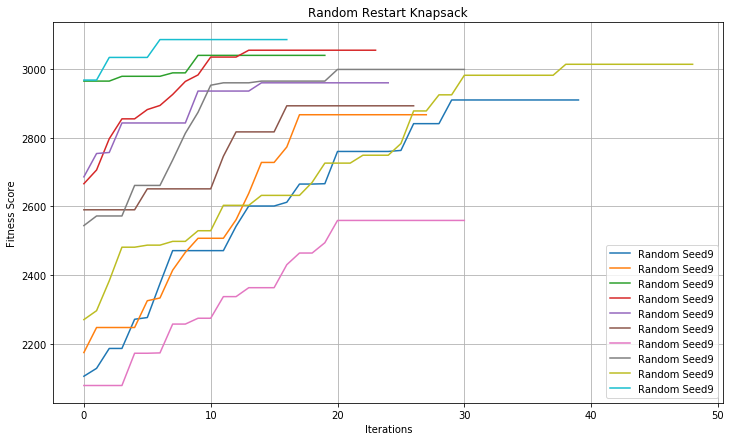

In [31]:
i=0
plt.figure(figsize=(12, 7))
plt.title('Random Restart Knapsack')
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

fitness_values = np.array(fitness_values)
index = np.argmax(fitness_values)
best_val = fitness_values[index]
print("Best Restart Value: ", index)
print("Best Value: ", best_val)

# For final plot
best_rhc_data = fin_data[index]

# Simulated Annealing

In [119]:
schedule = mlrose.ExpDecay()
fitness_values = []

fin_data = []
i=0
total_start_time = time.time()
for seed in seeds:
    start_time = time.time()
    best_state, best_fitness, data = sa_untuned(problem, schedule=schedule, seed=seed, max_iters=1000)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("=======================================\n")
    print("Seed number: ", i)
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()

Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20

Seed number:  0
Best State:  [1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1]
Best Fitness:  2984.0
Iterations:  20
Time Taken:  0.007585048675537109

Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current I

Average Fitness Value:  3041.2
Total Time Taken:  0.0938568115234375
Best Value:  3277.0


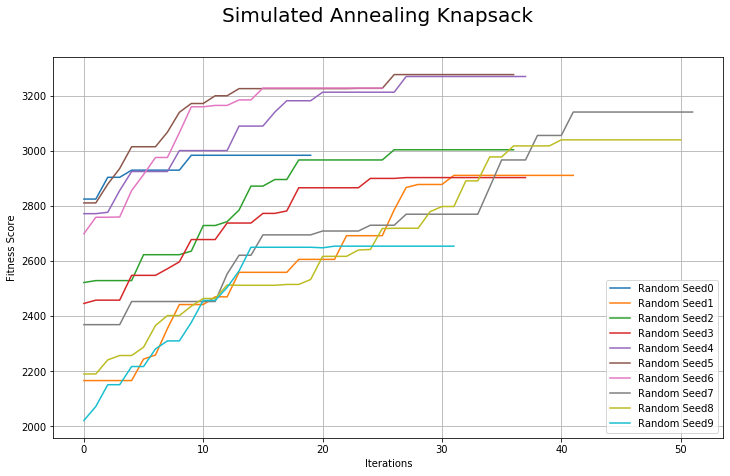

In [122]:
i=0
plt.figure(figsize=(12, 7))
plt.suptitle('Simulated Annealing Knapsack', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    label = "Random Seed" + str(i)
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

fitness_values = np.array(fitness_values)
index = np.argmax(fitness_values)
best_val = fitness_values[index]

print("Best Value: ", best_val)

# plt.savefig('SA.png')

#### Tuning Process

In [98]:
experiment_name = 'SA Tuning'
problem = mlrose.DiscreteOpt(length=len(values), fitness_fn=fitness, maximize=True, max_val=2)

sa = mlrose.SARunner(problem=problem,
                    experiment_name=experiment_name,
                    iteration_list=[100000],
                    temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                    decay_list=[mlrose.ExpDecay, mlrose.GeomDecay],
                    max_attempts=100,
                    seed=0)   
df_run_stats, df_run_curves = sa.run()

the_index = np.argmax(df_run_stats["Fitness"])
print("Best: ", df_run_stats.iloc[the_index])

best_index_in_curve = df_run_curves.Fitness.idxmax()
best_decay = df_run_curves.iloc[best_index_in_curve].Temperature
best_curve = df_run_curves.loc[df_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA Tuning], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2755.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0// 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA Tuning], attempt:[101], iteration:[177], done:[True], time:[0.02], fitness:[3158.0000]
	[0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0// 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA Tuning], attempt:[0], iteration:[0], 

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[SA Tuning], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2755.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0// 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[SA Tuning], attempt:[101], iteration:[1129], done:[True], time:[0.17], fitness:[4181.0000]
	[0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0// 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0// 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment

ExpDecay(init_temp=500, exp_const=0.005, min_temp=0.001)

#### SA Tuned

In [101]:
seeds = np.random.randint(1, 50, 10)
fitness_values = []
fin_data = []
i = 0

total_start_time = time.time()
for seed in seeds:
    print("=======================================\n")
    print("Seed number: ", i)
    start_time = time.time()
    best_state, best_fitness, data = sa_untuned(problem,schedule=mlrose.ExpDecay(init_temp=500, exp_const=0.005,
                                                                                min_temp=0.001),
                                                seed=seed, max_iters=100000)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()


Seed number:  0
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Cur

Current Iteration: 175
Current Iteration: 176
Current Iteration: 177
Current Iteration: 178
Current Iteration: 179
Current Iteration: 180
Current Iteration: 181
Current Iteration: 182
Current Iteration: 183
Current Iteration: 184
Current Iteration: 185
Current Iteration: 186
Current Iteration: 187
Current Iteration: 188
Current Iteration: 189
Current Iteration: 190
Current Iteration: 191
Current Iteration: 192
Current Iteration: 193
Current Iteration: 194
Current Iteration: 195
Current Iteration: 196
Current Iteration: 197
Current Iteration: 198
Current Iteration: 199
Current Iteration: 200
Current Iteration: 201
Current Iteration: 202
Current Iteration: 203
Current Iteration: 204
Current Iteration: 205
Current Iteration: 206
Current Iteration: 207
Current Iteration: 208
Current Iteration: 209
Current Iteration: 210
Current Iteration: 211
Current Iteration: 212
Current Iteration: 213
Current Iteration: 214
Current Iteration: 215
Current Iteration: 216
Current Iteration: 217
Current Ite

Current Iteration: 211
Current Iteration: 212
Current Iteration: 213
Current Iteration: 214
Current Iteration: 215
Current Iteration: 216
Current Iteration: 217
Current Iteration: 218
Current Iteration: 219
Current Iteration: 220
Current Iteration: 221
Current Iteration: 222
Current Iteration: 223
Current Iteration: 224
Current Iteration: 225
Current Iteration: 226
Current Iteration: 227
Current Iteration: 228
Current Iteration: 229
Current Iteration: 230
Current Iteration: 231
Current Iteration: 232
Current Iteration: 233
Current Iteration: 234
Current Iteration: 235
Current Iteration: 236
Current Iteration: 237
Current Iteration: 238
Current Iteration: 239
Current Iteration: 240
Current Iteration: 241
Current Iteration: 242
Current Iteration: 243
Current Iteration: 244
Current Iteration: 245
Current Iteration: 246
Current Iteration: 247
Current Iteration: 248
Current Iteration: 249
Current Iteration: 250
Current Iteration: 251
Current Iteration: 252
Current Iteration: 253
Current Ite

Current Iteration: 210
Current Iteration: 211
Current Iteration: 212
Current Iteration: 213
Current Iteration: 214
Current Iteration: 215
Current Iteration: 216
Current Iteration: 217
Current Iteration: 218
Current Iteration: 219
Current Iteration: 220
Current Iteration: 221
Current Iteration: 222
Current Iteration: 223
Current Iteration: 224
Current Iteration: 225
Current Iteration: 226
Current Iteration: 227
Current Iteration: 228
Current Iteration: 229
Current Iteration: 230
Current Iteration: 231
Current Iteration: 232
Current Iteration: 233
Current Iteration: 234
Current Iteration: 235
Current Iteration: 236
Current Iteration: 237
Current Iteration: 238
Current Iteration: 239
Current Iteration: 240
Current Iteration: 241
Current Iteration: 242
Current Iteration: 243
Current Iteration: 244
Current Iteration: 245
Current Iteration: 246
Current Iteration: 247
Current Iteration: 248
Current Iteration: 249
Current Iteration: 250
Current Iteration: 251
Current Iteration: 252
Current Ite

Current Iteration: 370
Current Iteration: 371
Current Iteration: 372
Current Iteration: 373
Current Iteration: 374
Current Iteration: 375
Current Iteration: 376
Current Iteration: 377
Current Iteration: 378
Current Iteration: 379
Current Iteration: 380
Current Iteration: 381
Current Iteration: 382
Current Iteration: 383
Current Iteration: 384
Current Iteration: 385
Current Iteration: 386
Current Iteration: 387
Current Iteration: 388
Current Iteration: 389
Current Iteration: 390
Current Iteration: 391
Current Iteration: 392
Current Iteration: 393
Current Iteration: 394
Current Iteration: 395
Current Iteration: 396
Current Iteration: 397
Current Iteration: 398
Current Iteration: 399
Current Iteration: 400
Current Iteration: 401
Current Iteration: 402
Current Iteration: 403
Current Iteration: 404
Current Iteration: 405
Current Iteration: 406
Current Iteration: 407
Current Iteration: 408
Current Iteration: 409
Current Iteration: 410
Current Iteration: 411
Current Iteration: 412
Current Ite

Current Iteration: 225
Current Iteration: 226
Current Iteration: 227
Current Iteration: 228
Current Iteration: 229
Current Iteration: 230
Current Iteration: 231
Current Iteration: 232
Current Iteration: 233
Current Iteration: 234
Current Iteration: 235
Current Iteration: 236
Current Iteration: 237
Current Iteration: 238
Current Iteration: 239
Current Iteration: 240
Current Iteration: 241
Current Iteration: 242
Current Iteration: 243
Current Iteration: 244
Current Iteration: 245
Current Iteration: 246
Current Iteration: 247
Current Iteration: 248
Current Iteration: 249
Current Iteration: 250
Current Iteration: 251
Current Iteration: 252
Current Iteration: 253
Current Iteration: 254
Current Iteration: 255
Current Iteration: 256
Current Iteration: 257
Current Iteration: 258
Current Iteration: 259
Current Iteration: 260
Current Iteration: 261
Current Iteration: 262
Current Iteration: 263
Current Iteration: 264
Current Iteration: 265
Current Iteration: 266
Current Iteration: 267
Current Ite

Current Iteration: 145
Current Iteration: 146
Current Iteration: 147
Current Iteration: 148
Current Iteration: 149
Current Iteration: 150
Current Iteration: 151
Current Iteration: 152
Current Iteration: 153
Current Iteration: 154
Current Iteration: 155
Current Iteration: 156
Current Iteration: 157
Current Iteration: 158
Current Iteration: 159
Current Iteration: 160
Current Iteration: 161
Current Iteration: 162
Current Iteration: 163
Current Iteration: 164
Current Iteration: 165
Current Iteration: 166
Current Iteration: 167
Current Iteration: 168
Current Iteration: 169
Current Iteration: 170
Current Iteration: 171
Current Iteration: 172
Current Iteration: 173
Current Iteration: 174
Current Iteration: 175
Current Iteration: 176
Current Iteration: 177
Current Iteration: 178
Current Iteration: 179
Current Iteration: 180
Current Iteration: 181
Current Iteration: 182
Current Iteration: 183
Current Iteration: 184
Current Iteration: 185
Current Iteration: 186
Current Iteration: 187
Current Ite

Current Iteration: 574
Current Iteration: 575
Current Iteration: 576
Current Iteration: 577
Current Iteration: 578
Current Iteration: 579
Current Iteration: 580
Current Iteration: 581
Current Iteration: 582
Current Iteration: 583
Current Iteration: 584
Current Iteration: 585
Current Iteration: 586
Current Iteration: 587
Current Iteration: 588
Current Iteration: 589
Current Iteration: 590
Current Iteration: 591
Current Iteration: 592
Current Iteration: 593
Current Iteration: 594
Current Iteration: 595
Current Iteration: 596
Current Iteration: 597
Current Iteration: 598
Current Iteration: 599
Current Iteration: 600
Current Iteration: 601
Current Iteration: 602
Current Iteration: 603
Current Iteration: 604
Current Iteration: 605
Current Iteration: 606
Current Iteration: 607
Current Iteration: 608
Current Iteration: 609
Current Iteration: 610
Current Iteration: 611
Current Iteration: 612
Current Iteration: 613
Current Iteration: 614
Current Iteration: 615
Current Iteration: 616
Best State:

Current Iteration: 247
Current Iteration: 248
Current Iteration: 249
Current Iteration: 250
Current Iteration: 251
Current Iteration: 252
Current Iteration: 253
Current Iteration: 254
Current Iteration: 255
Current Iteration: 256
Current Iteration: 257
Current Iteration: 258
Current Iteration: 259
Current Iteration: 260
Current Iteration: 261
Current Iteration: 262
Current Iteration: 263
Current Iteration: 264
Current Iteration: 265
Current Iteration: 266
Current Iteration: 267
Current Iteration: 268
Current Iteration: 269
Current Iteration: 270
Current Iteration: 271
Current Iteration: 272
Current Iteration: 273
Current Iteration: 274
Current Iteration: 275
Current Iteration: 276
Current Iteration: 277
Current Iteration: 278
Current Iteration: 279
Current Iteration: 280
Current Iteration: 281
Current Iteration: 282
Current Iteration: 283
Current Iteration: 284
Current Iteration: 285
Current Iteration: 286
Current Iteration: 287
Current Iteration: 288
Current Iteration: 289
Current Ite

Current Iteration: 211
Current Iteration: 212
Current Iteration: 213
Current Iteration: 214
Current Iteration: 215
Current Iteration: 216
Current Iteration: 217
Current Iteration: 218
Current Iteration: 219
Current Iteration: 220
Current Iteration: 221
Current Iteration: 222
Current Iteration: 223
Current Iteration: 224
Current Iteration: 225
Current Iteration: 226
Current Iteration: 227
Current Iteration: 228
Current Iteration: 229
Current Iteration: 230
Current Iteration: 231
Current Iteration: 232
Current Iteration: 233
Current Iteration: 234
Current Iteration: 235
Current Iteration: 236
Current Iteration: 237
Current Iteration: 238
Current Iteration: 239
Current Iteration: 240
Current Iteration: 241
Current Iteration: 242
Current Iteration: 243
Current Iteration: 244
Current Iteration: 245
Current Iteration: 246
Current Iteration: 247
Current Iteration: 248
Current Iteration: 249
Current Iteration: 250
Current Iteration: 251
Current Iteration: 252
Current Iteration: 253
Current Ite

Average Fitness Value:  3570.9
Total Time Taken:  2.3455889225006104
Best Restart Value:  5
Best Value:  3798.0


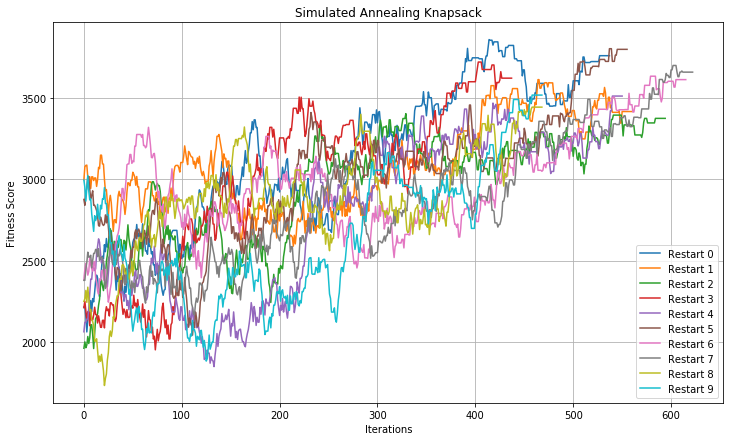

In [102]:
i=0
plt.figure(figsize=(12, 7))
plt.title('Simulated Annealing Knapsack')
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    label = "Restart " + str(restarts[i])
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

fitness_values = np.array(fitness_values)
index = np.argmax(fitness_values)
best_val = fitness_values[index]
print("Best Restart Value: ", index)
print("Best Value: ", best_val)

# For final plot
best_sa_data = fin_data[index]

# Genetic Algorithm

In [124]:
fitness_values = []

fin_data = []
i=0
total_start_time = time.time()
for seed in seeds:
    start_time = time.time()
    best_state, best_fitness, data = ga_untuned(problem, seed=seed, pop_size=200, mutation=0.1, max_iters=1000)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("=======================================\n")
    print("Seed number: ", i)
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()

Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 4

Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteratio

Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Itera

Average Fitness Value:  4518.9
Total Time Taken:  24.788880825042725
Best Value:  4522.0


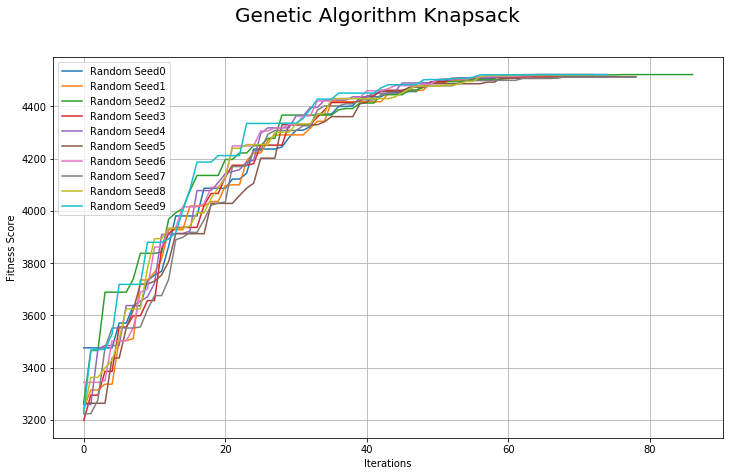

In [125]:
i=0
plt.figure(figsize=(12, 7))
plt.suptitle('Genetic Algorithm Knapsack', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    label = "Random Seed" + str(i)
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

fitness_values = np.array(fitness_values)
index = np.argmax(fitness_values)
best_val = fitness_values[index]

print("Best Value: ", best_val)

plt.savefig('GA.png')

#### Tuning Process

In [66]:
ga = mlrose.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=0,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[50, 200, 500],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()

the_index = np.argmax(ga_run_stats["Fitness"])
ga_run_stats.iloc[the_index]

Running ga
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2755.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0// 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0// 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1...

pop_size:[50], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[101], iteration:[220], done:[True], time:[1.54], fitness:[4490.0000]
	[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.25], max_iters:[100000]
runner_name:[g

Iteration                                                     100000
Fitness                                                         4522
Time                                                         4.98313
State              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Population Size                                                  200
Mutation Rate                                                    0.5
max_iters                                                     100000
Name: 11, dtype: object

#### Tuned

In [105]:
seeds = np.random.randint(1, 50, 10)
fitness_values = []
fin_data = []
i = 0

total_start_time = time.time()
for seed in seeds:
    print("=======================================\n")
    print("Seed number: ", i)
    start_time = time.time()
    best_state, best_fitness, data = ga_untuned(problem, seed=seed, pop_size=200, mutation=0.5, max_iters=100000)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()


Seed number:  0
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Cur

Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 54
Current Iteration: 55
Current Iteration: 56
Current Iteration: 57
Current Iteration: 58
Current Iteration: 59
Current Iteration: 60
Current Iteration: 61
Current Iteration: 62
Current Iteration: 63
Current Iteration: 64
Current Iteration: 65
Current Iteration: 66
Current Iteration: 67
Current Iteration: 68
Current Iteration: 69
Current Iteration: 70
Current Iteration: 71
Current Iteration: 72
Current Iteration: 73
Current Iteration: 74
Current Iteration: 75
Current Iteration: 76
Current Iteration: 77
Current Iteration: 78
Current Iteration: 79
Current Iteration: 80
Current Iteration: 81
Current Iteration: 82
Current Iteration: 83
Current Iteration: 84
Current Iteration: 85
Best State:  [0 0 0 0 0 0 1 0 0 

Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Current Iteration: 44
Current Iteration: 45
Current Iteration: 46
Current Iteration: 47
Current Iteration: 48
Current Iteration: 49
Current Iteration: 50
Current Iteration: 51
Current Iteration: 52
Current Iteration: 53
Current Iteration: 54
Current Iteration: 55
Current Iteration: 56
Current Iteration: 57
Current Iteration: 58
Current Iteration: 59
Current Iteration: 60
Current Iteration: 61
Current Iteration: 62
Current Iteration: 63
Current Iteration: 64
Current Iteration: 65
Current It

Average Fitness Value:  4459.3
Total Time Taken:  27.313315868377686
Best Restart Value:  2
Best Value:  4522.0


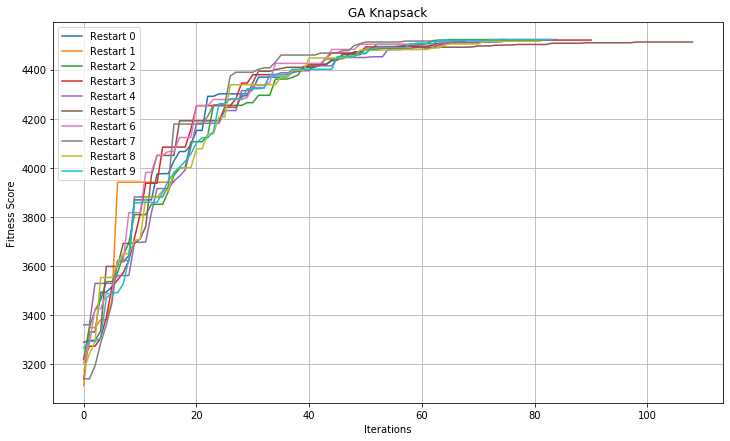

In [106]:
i=0
plt.figure(figsize=(12, 7))
plt.title('GA Knapsack')
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    label = "Restart " + str(restarts[i])
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

fitness_values = np.array(fitness_values)
index = np.argmax(fitness_values)
best_val = fitness_values[index]
print("Best Restart Value: ", index)
print("Best Value: ", best_val)

# For final plot
best_ga_data = fin_data[index]

# MIMIC

In [126]:
fitness_values = []

fin_data = []
i=0
total_start_time = time.time()
for seed in seeds:
    start_time = time.time()
    best_state, best_fitness, data = mimic_untuned(problem, seed=seed, max_iters=1000, pop_size=200, keep_pct=0.2)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("=======================================\n")
    print("Seed number: ", i)
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()

Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26

Seed number:  0
Best State:  [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best Fitness:  4325.0
Iterations:  26
Time Taken:  160.45650506019592

Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Curren

Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22

Seed number:  9
Best State:  [0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best Fitness:  4449.0
Iterations:  22
Time Taken:  161.61893606185913



Average Fitness Value:  4401.2
Total Time Taken:  1699.5017020702362
Best Value:  4478.0


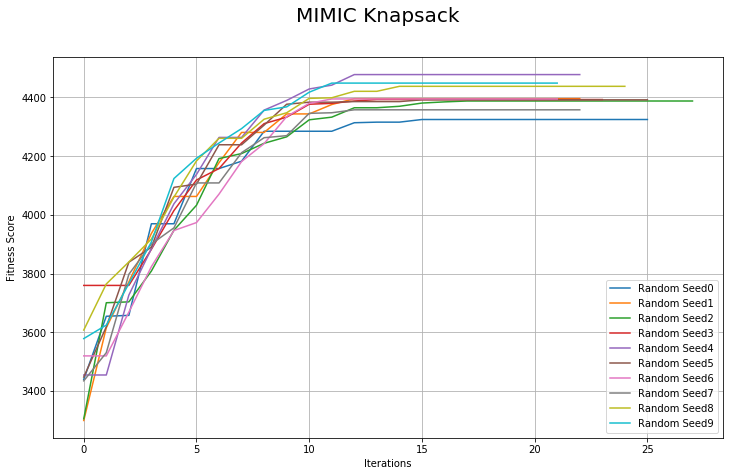

In [127]:
i=0
plt.figure(figsize=(12, 7))
plt.suptitle('MIMIC Knapsack', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    label = "Random Seed" + str(i)
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

fitness_values = np.array(fitness_values)
index = np.argmax(fitness_values)
best_val = fitness_values[index]

print("Best Value: ", best_val)

plt.savefig('MIMIC.png')

In [67]:

mmc = mlrose.MIMICRunner(problem=problem,
                  experiment_name="MMC_Exp",
                  seed=44,
                  iteration_list=[100000],
                  max_attempts=100,
                  population_sizes=[50, 200, 500],
                  keep_percent_list=[0.25, 0.5, 0.75],
                  use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

the_index = np.argmax(mmc_run_stats["Fitness"])
mmc_run_stats.iloc[the_index]

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[50], keep_pct:[0.25], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2724.0000]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

use_fast_mimic:[True], pop_size:[50], keep_pct:[0.25], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[101], iteration:[105], done:[True], time:[4.21], fitness:[3668.0000]
	[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.// 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.// 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True]

Iteration                                                     100000
Fitness                                                         4518
Time                                                         23.6385
State              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
use_fast_mimic                                                  True
Population Size                                                  500
Keep Percent                                                     0.5
max_iters                                                     100000
Name: 15, dtype: object

#### Tuned

In [111]:
seeds = np.random.randint(1, 50, 10)
fitness_values = []
fin_data = []
i = 0

total_start_time = time.time()
for seed in seeds:
    print("=======================================\n")
    print("Seed number: ", i)
    start_time = time.time()
    best_state, best_fitness, data = mimic_untuned(problem, seed=seed, pop_size=500, max_iters=100000, 
                                                  keep_pct=0.5)
    end_time = time.time()
    
    fitness_values.append(best_fitness)
    fin_data.append(data)
    
    print("Best State: ", best_state)
    print("Best Fitness: ", best_fitness)
    print("Iterations: ", len(data))
    print("Time Taken: ", end_time - start_time)
    print("\n=======================================")
    i+=1

total_end_time = time.time()


Seed number:  0
Current Iteration: 0
Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Current Iteration: 41
Current Iteration: 42
Current Iteration: 43
Best State:  [0 0 0 0 0 0

Current Iteration: 1
Current Iteration: 2
Current Iteration: 3
Current Iteration: 4
Current Iteration: 5
Current Iteration: 6
Current Iteration: 7
Current Iteration: 8
Current Iteration: 9
Current Iteration: 10
Current Iteration: 11
Current Iteration: 12
Current Iteration: 13
Current Iteration: 14
Current Iteration: 15
Current Iteration: 16
Current Iteration: 17
Current Iteration: 18
Current Iteration: 19
Current Iteration: 20
Current Iteration: 21
Current Iteration: 22
Current Iteration: 23
Current Iteration: 24
Current Iteration: 25
Current Iteration: 26
Current Iteration: 27
Current Iteration: 28
Current Iteration: 29
Current Iteration: 30
Current Iteration: 31
Current Iteration: 32
Current Iteration: 33
Current Iteration: 34
Current Iteration: 35
Current Iteration: 36
Current Iteration: 37
Current Iteration: 38
Current Iteration: 39
Current Iteration: 40
Best State:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 

Average Fitness Value:  4514.3
Total Time Taken:  2556.2529017925262
Best Restart Value:  4
Best Value:  4522.0


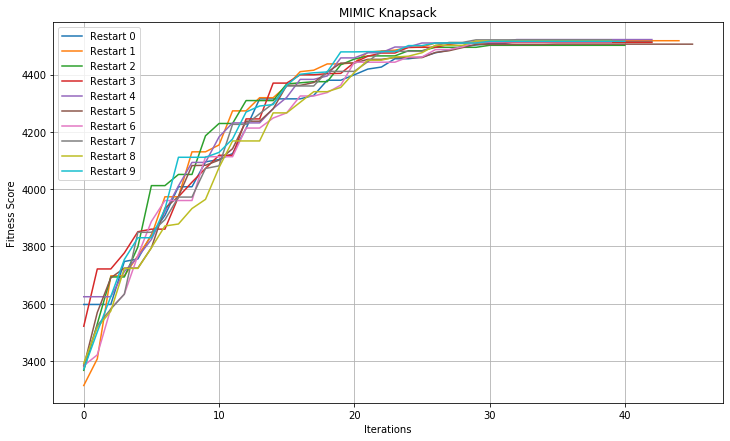

In [112]:
i=0
plt.figure(figsize=(12, 7))
plt.title('MIMIC Knapsack')
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.grid()
for data in fin_data:
    label = "Restart " + str(restarts[i])
    plt.plot(data, label=label)
    i += 1
plt.legend(loc='best')

print("Average Fitness Value: ", sum(fitness_values)/len(fitness_values))
print("Total Time Taken: ", total_end_time - total_start_time)

fitness_values = np.array(fitness_values)
index = np.argmax(fitness_values)
best_val = fitness_values[index]
print("Best Restart Value: ", index)
print("Best Value: ", best_val)

# For final plot
best_mimic_data = fin_data[index]

# Final Plot

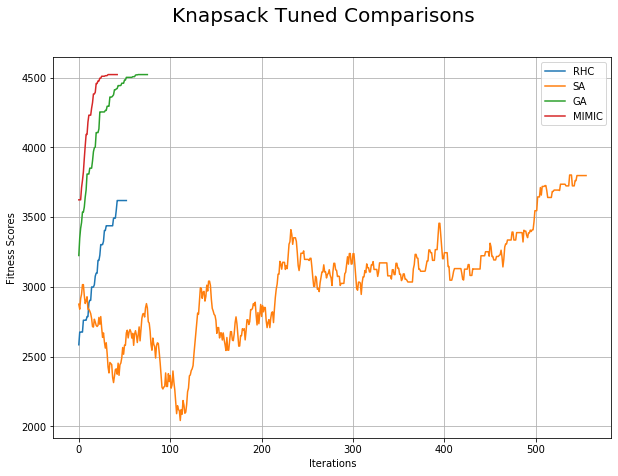

In [129]:
plt.figure(figsize=(10, 7))
plt.suptitle('Knapsack Tuned Comparisons', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Fitness Scores')
plt.grid()
plt.plot(best_rhc_data, label='RHC')
plt.plot(best_sa_data, label='SA')
plt.plot(best_ga_data, label='GA')
plt.plot(best_mimic_data, label='MIMIC')
plt.legend(loc='best')

plt.savefig('Final.png')

# Testing using ORTools 

In [32]:
solver = pywrapknapsack_solver.KnapsackSolver(
    pywrapknapsack_solver.KnapsackSolver.
    KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 'KnapsackExample')

In [33]:
weights = [list(weights)]
print("Weights: ", weights)
values = values
print("Values: ", values)
capacity = [np.ceil(np.sum(weights) * 0.6 * 1.0)]

Weights:  [[12, 4, 13, 6, 4, 10, 1, 12, 8, 11, 12, 3, 6, 14, 13, 10, 11, 9, 11, 9, 14, 9, 9, 6, 10, 6, 6, 2, 2, 3, 7, 11, 4, 4, 2, 1, 9, 6, 1, 1, 3, 5, 9, 6, 8, 1, 3, 13, 14, 6, 13, 12, 4, 13, 13, 2, 3, 13, 9, 9, 2, 7, 8, 12, 10, 1, 10, 13, 2, 3, 7, 5, 2, 11, 6, 2, 11, 7, 13, 6, 1, 1, 9, 2, 4, 6, 3, 12, 14, 13, 9, 9, 2, 9, 1, 8, 3, 9, 2, 5]]
Values:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [34]:
solver.Init(values, weights, capacity)
start_time = time.time()
computed_value = solver.Solve()
end_time = time.time()
packed_items = []
packed_weights = []
total_weight = 0
print('Total value =', computed_value)
for i in range(len(values)):
    if solver.BestSolutionContains(i):
        packed_items.append(i)
        packed_weights.append(weights[0][i])
        total_weight += weights[0][i]
print('Total weight:', total_weight)
print('Packed items:', packed_items)
print('Packed_weights:', packed_weights)

print('Total time: ', end_time - start_time)

Total value = 4522
Total weight: 427
Packed items: [6, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Packed_weights: [1, 6, 6, 6, 2, 2, 3, 7, 4, 4, 2, 1, 9, 6, 1, 1, 3, 5, 9, 6, 8, 1, 3, 6, 12, 4, 13, 2, 3, 13, 9, 9, 2, 7, 8, 12, 10, 1, 10, 13, 2, 3, 7, 5, 2, 11, 6, 2, 11, 7, 13, 6, 1, 1, 9, 2, 4, 6, 3, 12, 14, 13, 9, 9, 2, 9, 1, 8, 3, 9, 2, 5]
Total time:  0.00012302398681640625
